# Probability distributions

We have already seen how different probability distributions are related: if we repeat Bernoulli trials, the resulting random variable has a binomial distribution. In the limit as $n$ increases, this gives us the normal distribution.

Many other probability distributions can be constructed by combining random variables in different ways. These various distributions can be useful for describing all kinds of real-world phenomena.

In this section we focus on just a handful of distributions that are especially relevent when working with financial data.

## Poisson distribution

Consider again the binomial distribution as $n\to\infty$, but assume that the probability $p$ is defined such that the product of $n$ and $p$ remains constant. In particular, assume that for any $n$,

$$np = \lambda$$

for some constant $\lambda > 0$. In other words, for each $n$, we let $p_{n} = \frac{\lambda}{n}$ be a sequence of probabilities. It [can be shown that](https://en.wikipedia.org/wiki/Poisson_limit_theorem)

$$\lim _{n\to \infty }{n \choose k}p_{n}^{k}(1-p_{n})^{n-k}=e^{-\lambda }{\frac {\lambda ^{k}}{k!}}.$$

The function in the limit gives the PMF of a random variable $X$ with a Poisson distribution:

$$\!f(k; \lambda)= \P(X=k)= \frac{\lambda^k e^{-\lambda}}{k!}.$$

Both panels of the figure below show a Poisson distribution with $\lambda=5$, along with a Binomial distribution. In both panels, $np=5$, but in the left panel $n=25$ while in the right $n=250$. It is clear that the Binomial probabilities get closer to the Poisson probabilities with the larger value of $n$.

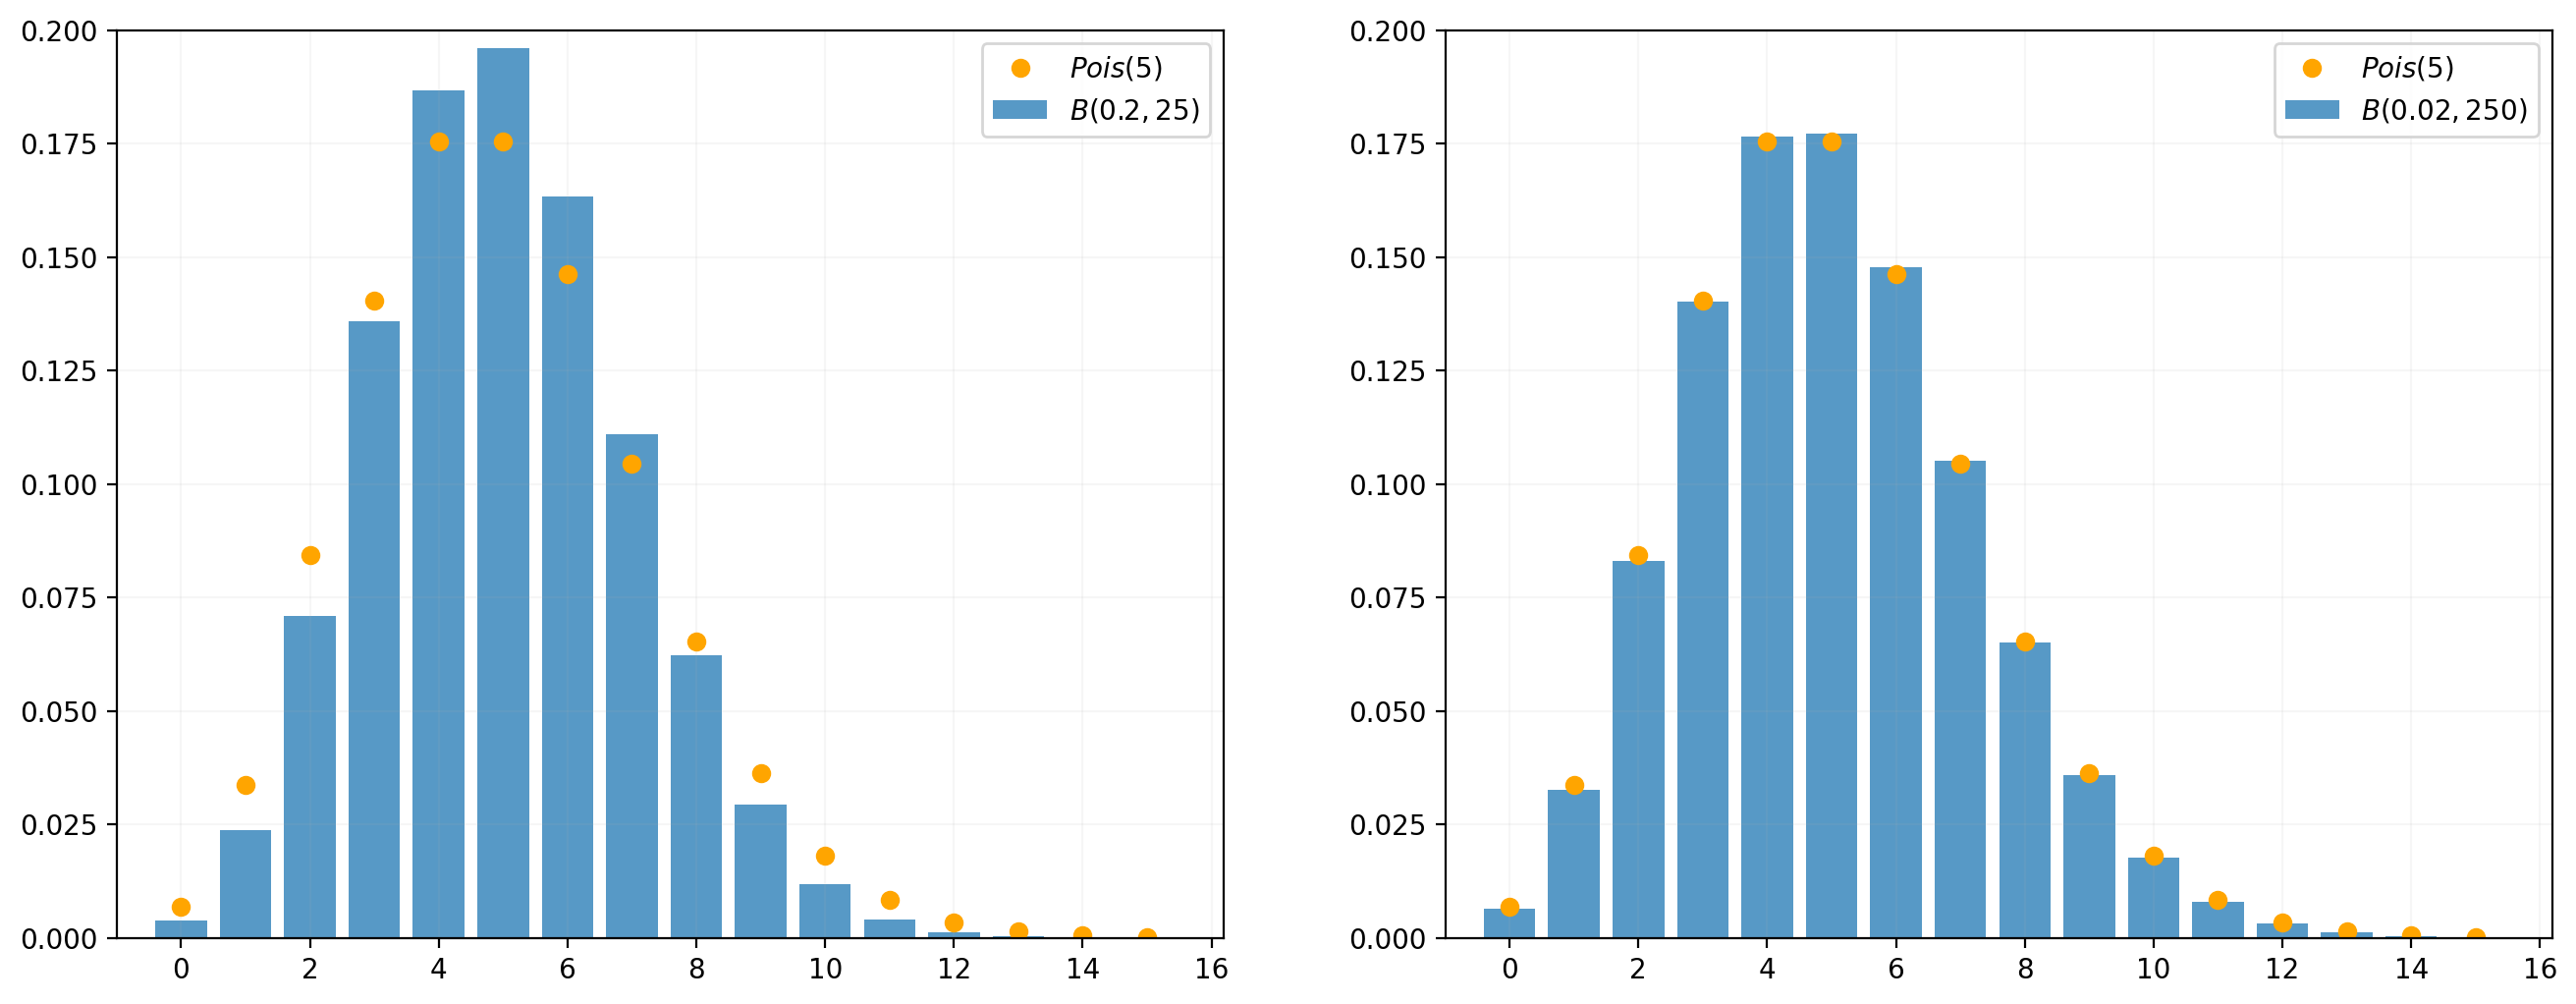

In [12]:
λ=5

domain = np.arange(16)
p_poiss = scs.poisson.pmf(domain, λ)

fig, axes = plt.subplots(1, 2, figsize=(16,6))

for n,ax in zip([25,250], axes.ravel()):
    p = λ / n
    p_binom = scs.binom(n, p).pmf(domain)

    ax.bar(domain, p_binom, alpha=0.75, align='center', label='$B({},{})$'.format(p,n))
    ax.plot(domain, p_poiss, 'o', color='orange', label='$Pois({})$'.format(λ))
    ax.legend(loc='upper right')
    ax.set_xlim(-1,None)
    ax.set_ylim(0,0.2)
    ax.grid(alpha=0.1)
plt.show()

:::{margin}
<blockquote class="twitter-tweet"><p lang="en" dir="ltr">One of the first practical applications of the Poisson distribution was made by Ladislaus Bortkiewicz in 1898 when he was given the task of investigating the number of soldiers in the Prussian army killed accidentally by horse kicks <a href="https://t.co/7QqAxV7e5v">pic.twitter.com/7QqAxV7e5v</a></p>&mdash; Fermat&#39;s Library (@fermatslibrary) <a href="https://twitter.com/fermatslibrary/status/1410219746205765633?ref_src=twsrc%5Etfw">June 30, 2021</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>
:::

The Poisson distribution is useful for modelling events that occur rarely in a short interval of time, but where there are many such intervals. Examples include:

- how many creditors may default on a loan in a year;
- how many car accidents occur in a group of insured drivers;
- how many customers enter a store in a day;
- how many people call a customer support line in an hour.

The parameter $\lambda > 0$ gives the rate per period at which events are expected to occur. It equals both the mean and the variance of the distribution.

In [13]:
print('E(X) = {}'.format(scs.poisson(λ).mean()))
print('Var(X) = {}'.format(scs.poisson(λ).var()))

E(X) = 5.0
Var(X) = 5.0


:::{admonition} Extra credit
:class: admonition-extra-credit, dropdown

To find the expected value of a Poisson random variable $X$, start with the definition of expectation:

```{math}
\begin{aligned}
\E(X) &= \sum_{k=0}^{\infty} \P(X=k) \cdot k  \\
&= \sum_{k=0}^{\infty} \frac{\lambda^{k} e^{-\lambda}}{k!} k \\
&=e^{-\lambda} \sum_{k=1}^{\infty} \frac{k \lambda^{k}}{k!} \\
&=\lambda e^{-\lambda} \sum_{k=1}^{\infty} \frac{\lambda^{k-1}}{(k-1)!} \\
&=\lambda e^{-\lambda} \sum_{j=0}^{\infty} \frac{\lambda^{j}}{j!}.
\end{aligned}
```

The infinite sum is

$$1 + \lambda + \frac{\lambda^2}{2} + \frac{\lambda^3}{3!} + \cdots = e^{\lambda},$$

which can be seen by taking a {ref}`TaylorSeries` of $e^x$ at zero. Therefore,

$$\E(X) =\lambda e^{-\lambda} e^{\lambda} = \lambda.$$

To find the variance, we can find $\E(X^2)$ using a similar approach:

```{math}
\begin{aligned}
\E(X^2) &= \sum_{k=0}^{\infty} \frac{\lambda^{k} e^{-\lambda}}{k!} k^2 \\
&=e^{-\lambda} \sum_{k=1}^{\infty} \frac{k \, \lambda \, \lambda^{k-1}}{(k-1)!} \\
&=\lambda e^{-\lambda} \sum_{k=1}^{\infty} k \frac{\lambda^{k-1}}{(k-1)!} \\
&=\lambda e^{-\lambda} \sum_{j=0}^{\infty} (j+1)\frac{\lambda^{j}}{j!}.
\end{aligned}
```

The summation term is

```{math}
\begin{aligned}
\sum_{j=0}^{\infty} (j+1)\frac{\lambda^{j}}{j!} &= \sum_{j=0}^{\infty} j\frac{\lambda^{j}}{j!} + \sum_{j=0}^{\infty}\frac{\lambda^{j}}{j!} \\
&= \lambda \sum_{j=1}^{\infty} \frac{\lambda^{j-1}}{(j-1)!} \; + \; e^{\lambda} \\
&= \lambda \sum_{i=0}^{\infty} \frac{\lambda^{i}}{i!} \; + \; e^{\lambda} \\
&= \lambda e^{\lambda} + e^{\lambda} \\
&= e^{\lambda}(\lambda+1).
\end{aligned}
```

Therefore,

$$\E(X^2) = \lambda(\lambda+1),$$

so

$$\var(X) = \E(X^2) - \E(X)^2 = \lambda.$$

:::

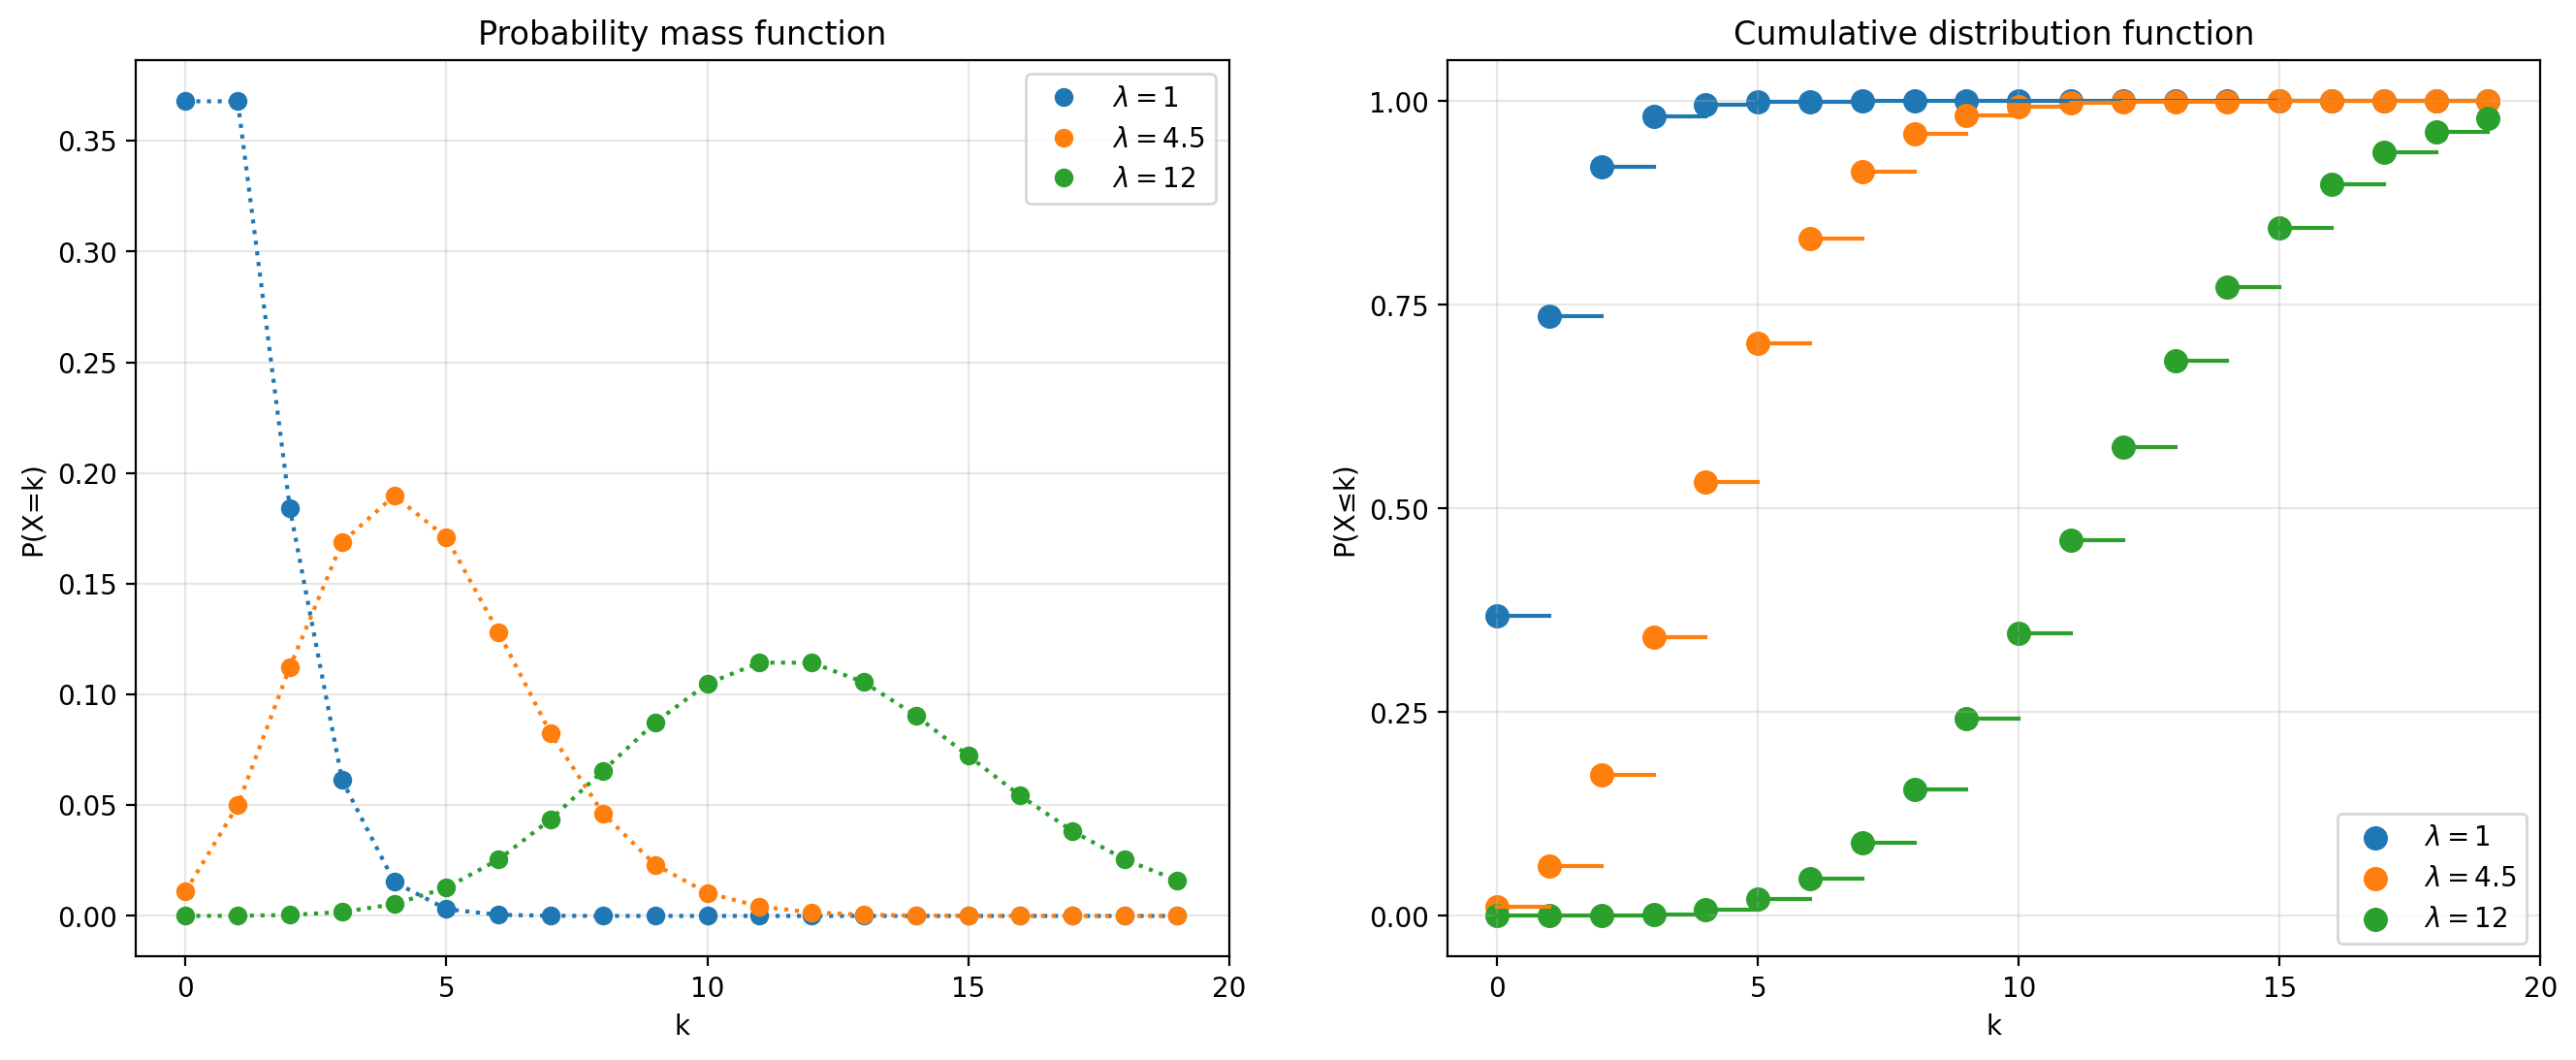

In [14]:
x = np.arange(0, 20)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

for i,λ in enumerate([1, 4.5, 12]):
    p = scs.poisson.pmf(x, λ)
    ax1.plot(x, p, 'o', label=f'$\lambda={λ}$', zorder=3)
    ax1.plot(x, p, ':', color=colors[i])
    
    P = scs.poisson.cdf(x, λ)
    ax2.scatter(x, P, lw=3, label=f'$\lambda={λ}$')
    for k in range(1,len(x)):
        ax2.plot([k-1,k], [P[k-1],P[k-1]], '-', color=colors[i])
    
for ax in [ax1, ax2]:
    ax.grid(alpha=0.3)
    ax.set_xticks([0, 5, 10, 15, 20])
    ax.set_xlabel('k')
    
ax1.set_title('Probability mass function')
ax1.legend(loc='upper right')
ax1.set_ylabel('P(X=k)')

ax2.set_title('Cumulative distribution function')
ax2.legend(loc='lower right')
ax2.set_ylabel('P(X≤k)')
ax2.set_yticks([0, .25, .5, .75, 1])
    
plt.show()

Note that the PMF is define only over the integers; the lines between the dots are simply visual aids. Note also that $\lambda$ can be any positive real number.

## Log-normal distribution

Suppose $Y \sim \N(\mu,\sigma^2)$, and define

$$X=e^Y.$$

Then $X$ has a Log-normal distribution with PDF

$$f_X(x; \mu, \sigma)={\frac {1}{\sigma x {\sqrt {2\pi }}}}\exp\left\{-{\frac {1}{2}}\left({\frac {\ln x-\mu }{\sigma }}\right)^{2}\right\}.$$

The distribution is defined only for $x>0$. (Given its definition, regardless of the realization of $Y$, the value for $X$ will always be positive.)

The plots below show PDFs and CDFs for log-normal random variables as we vary $\sigma$ but fix $\mu=0$.

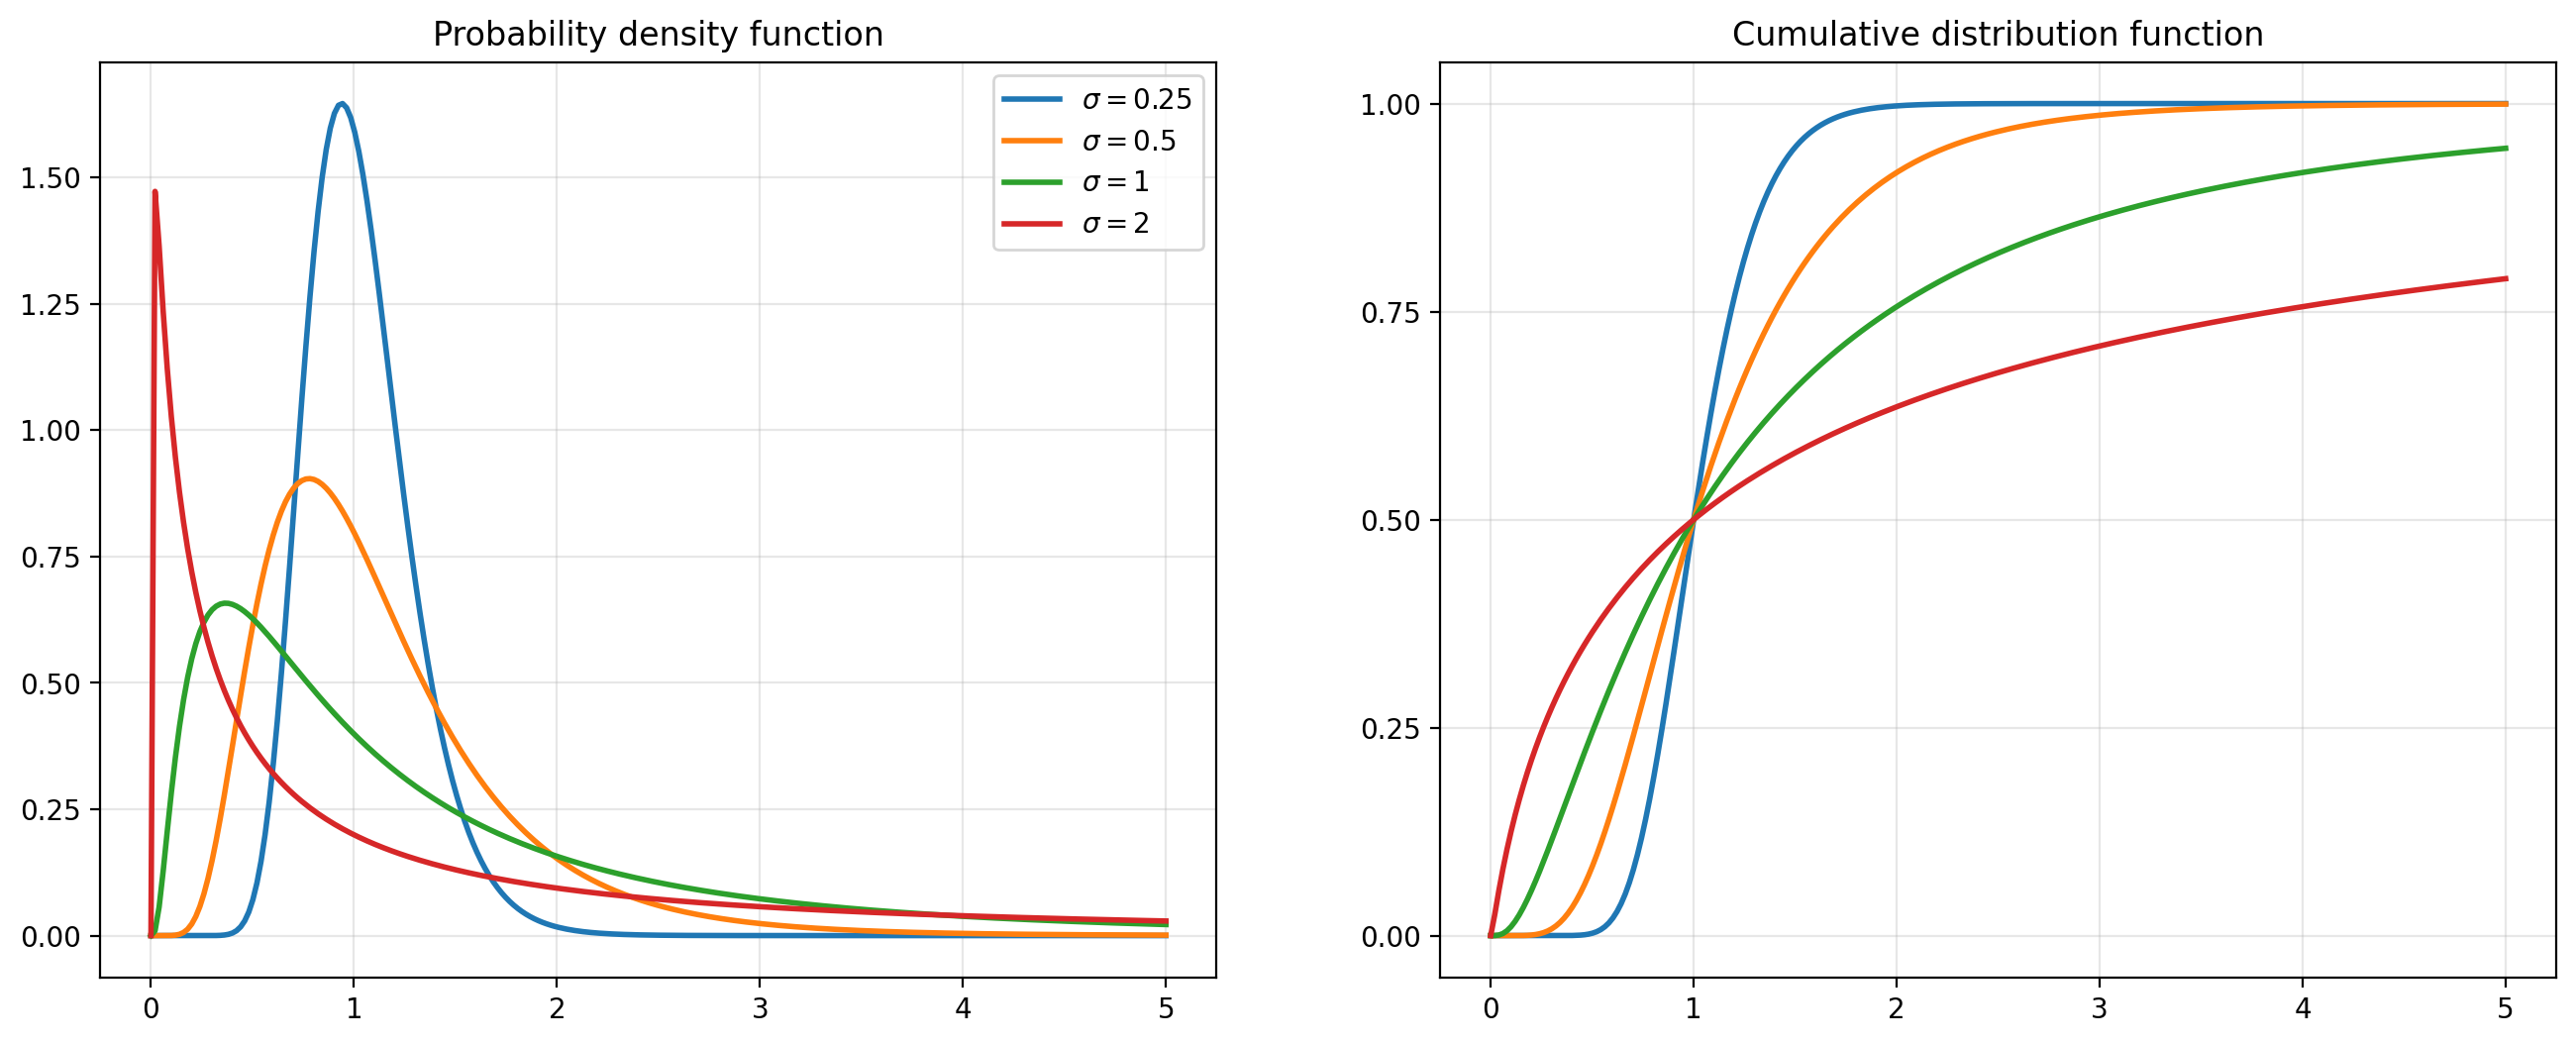

In [21]:
x = np.linspace(0, 5, 250)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))

for σ in [0.25, 0.5, 1, 2]:
    ax1.plot(x, scs.lognorm.pdf(x, s=σ), lw=2, label='$\sigma={}$'.format(σ))
    ax2.plot(x, scs.lognorm.cdf(x, s=σ), lw=2, label='$\sigma={}$'.format(σ))

ax1.legend(loc='upper right')
    
ax1.grid(alpha=0.3)
ax2.grid(alpha=0.3)

ax1.set_title('Probability density function')
ax2.set_title('Cumulative distribution function')

ax2.set_yticks([0, .25, .5, .75, 1])
    
plt.show()

Notice that despite holding $\mu$ constant, the location of the PDF shifts as we change $\sigma$. The mean of the distribution must therefore depend also on $\sigma$, and in  fact is given by

$$\E(X) = \exp\left\{\left(\mu +{\frac {\sigma ^{2}}{2}}\right)\right\}.$$

:::{admonition} Extra credit
:class: admonition-extra-credit, dropdown

The math behind this result is a little tricky, but really we just need to remember how to [complete the square](https://en.wikipedia.org/wiki/Completing_the_square). (In 2020 a professor at Carnegie Mellon shared [a new method](https://www.nytimes.com/2020/02/05/science/quadratic-equations-algebra.html) to complete a square, which modifies a technique that has been known for thousands of years.)

Start with the definition of expected value:

```{math}
\begin{aligned}
\E\left(e^y\right) &=\int_{-\infty}^{\infty} e^y \cdot f_Y(y) \, dy \\
&=\int_{-\infty}^{\infty} e^y \cdot \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{1}{2}\left(\frac{y-\mu}{\sigma}\right)^{2}} dy \\
&=\int_{-\infty}^{\infty} \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{1}{2 \sigma^{2}}\left(y^{2}-2 \mu y+\mu^{2}-2 \sigma^{2} y\right)} dy \\
&=\int_{-\infty}^{\infty} \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{1}{2 \sigma^{2}}\left(y^{2}-2\left(\mu+\sigma^{2}\right) y+\mu^{2}\right)} dy
\end{aligned}
```

Here's where we complete the square. We can write

```{math}
\begin{aligned}
\exp\left[{-\frac{1}{2 \sigma^{2}}\left(y^{2}-2\left(\mu+\sigma^{2}\right) y+\mu^{2}\right)}\right] &= \exp\left[{-\frac{1}{2 \sigma^{2}}\left(y - (\mu+\sigma^2)\right)^2} +\frac{1}{2 \sigma^{2}}(2\mu\sigma^2 + \sigma^4)\right] \\
&= \exp\left[{-\frac{1}{2 \sigma^{2}}\left(y - (\mu+\sigma^2)\right)^2}\right] \cdot \exp\left[\mu + \frac{\sigma^2}{2}\right]
\end{aligned}
```

Therefore,

```{math}
\begin{aligned}
\E\left(e^y\right)&=\int_{-\infty}^{\infty} \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{1}{2 \sigma^{2}}\left(y-\left(\mu+\sigma^{2}\right)\right)^{2}} e^{\left(\mu+\frac{1}{2} \sigma^{2}\right)} dy \\
&=e^{\left(\mu+\frac{1}{2} \sigma^{2}\right)} \int_{-\infty}^{\infty} \underbrace{\frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{1}{2 \sigma^{2}}\left(y-(\mu+\sigma)^{2}\right)^{2}}}_{\text{PDF of normal}} dy  \\
&=e^{\left(\mu+\frac{1}{2} \sigma^{2}\right)}.
\end{aligned}
```

Here, we've used the fact that the function over the brace is the PDF of a normal distribution, and therefore integrating over the whole real line equals one. (This PDF is of a random variable that has a mean of $(\mu + \sigma)^2$ but that is irrelevant; all that matters is that it is a PDF and therefore the integral must be one.)

In [16]:
σ = 1
np.exp(σ**2 / 2)   # μ=0

1.6487212707001282

In [17]:
scs.lognorm(s=1).mean()

1.6487212707001282

The median is $e^{\mu}$, which can easily be seen from the plots of the CDFs above.

In [18]:
scs.lognorm(s=1).median()

1.0

The log-normal distribution is often used in various financial applications. One reason is that, since the price of a stock can never be negative, it makes sense to model the price with a distribution that also never gives negative values.

## Chi-squared distribution

Suppose $Z_i \sim \N(0,1)$ and we calculate

$$X = \sum_{i=1}^k Z_i^2.$$

Then $X$ follows a [chi-squared](https://en.wikipedia.org/wiki/Chi-squared_distribution) distribution with $k$ degrees of freedom, $X\sim \chi^2_k$.

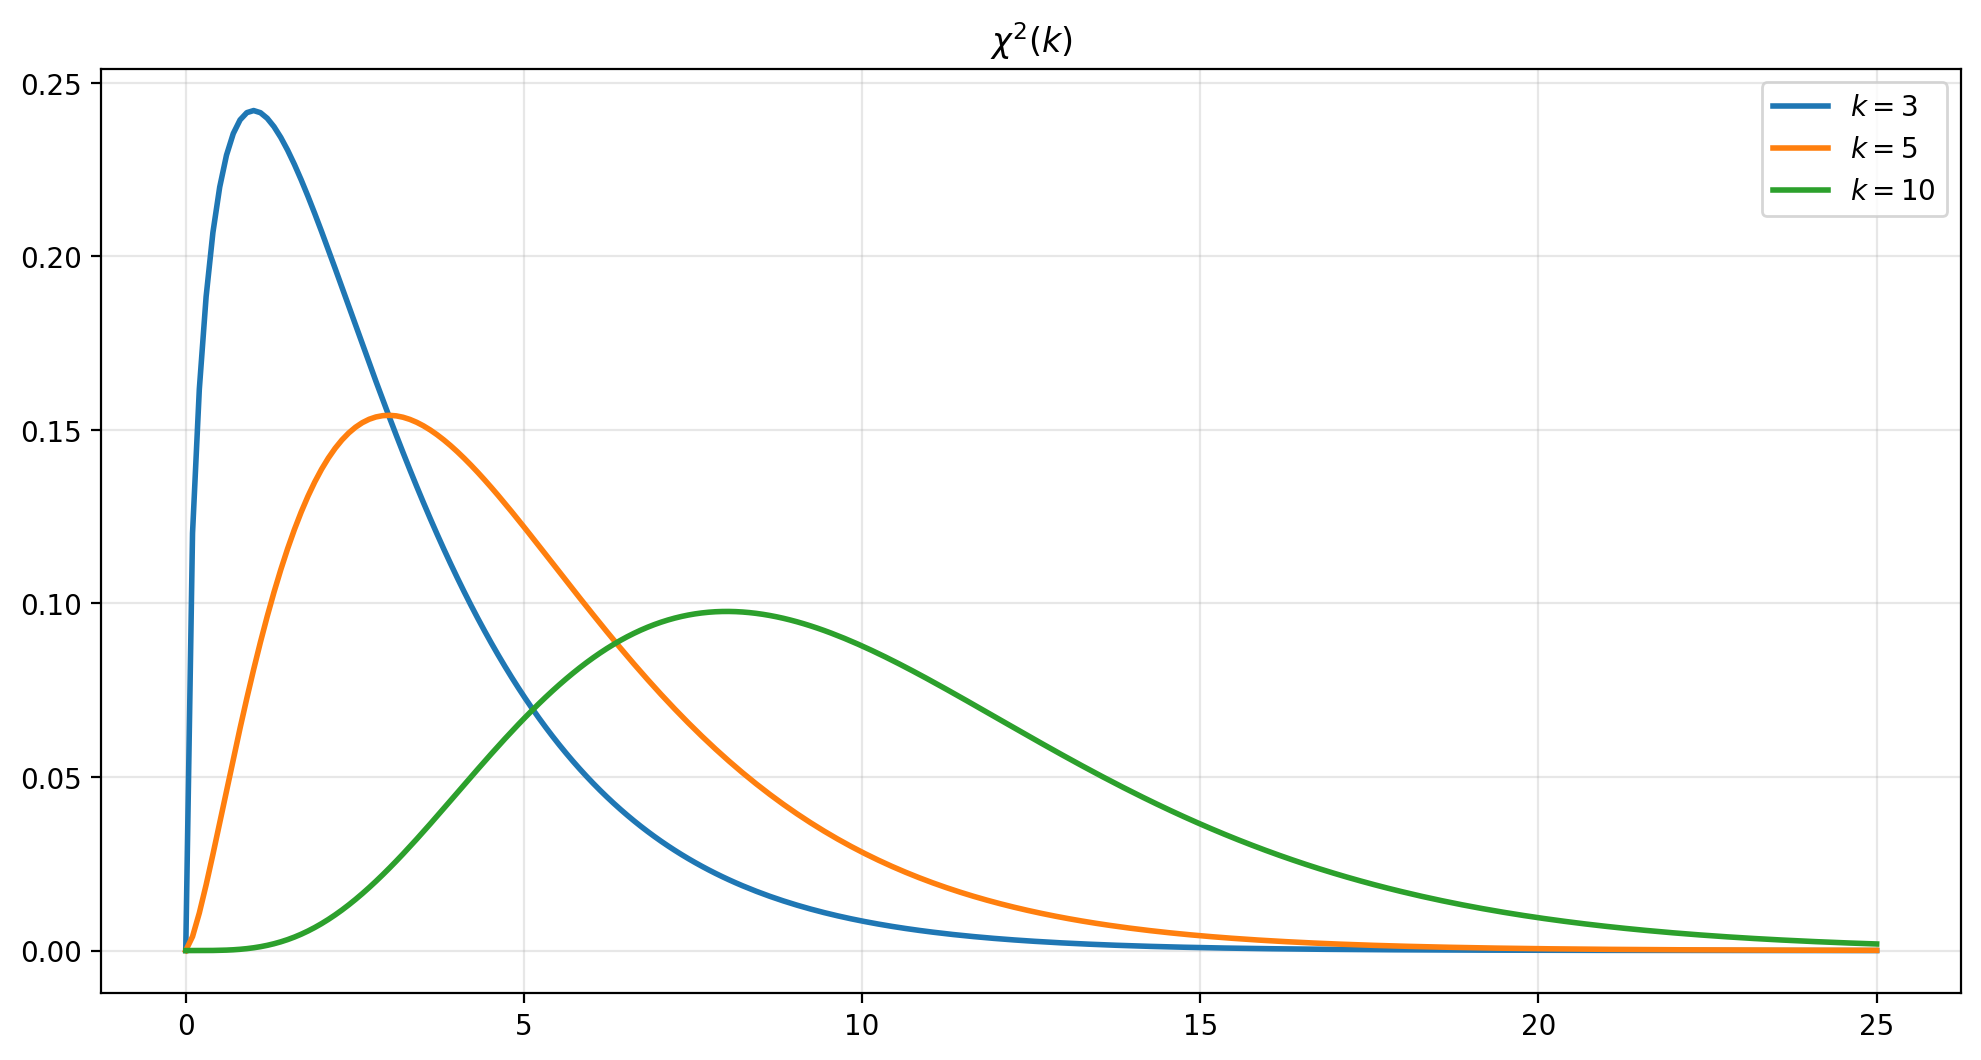

In [38]:
x = np.linspace(0, 25, 250)

fig, ax = plt.subplots(figsize=(12,6))

for df1 in [3, 5, 10]:
    ax.plot(x, scs.chi2.pdf(x, df1), lw=2, label='$k={}$'.format(df1))

ax.grid(alpha=0.3)  
ax.set_title('$\chi^2(k)$')
ax.legend(loc='upper right')
    
plt.show()

If $X\sim\chi^2(k)$ then $\E(X)=k$ and $\var(X)=2k.$

## Student's $t$ distribution

Suppose $Z \sim \N(0,1)$ and $Q \sim \chi^2_{\nu}$. Then

$$X = \frac{Z}{\sqrt{Q/\nu}}$$

follows a Student's $t$ distribution with $\nu$ degrees of freedom. Its PDF is

$$f(x; \nu) = \frac{\Gamma\!\left(\frac{\nu+1}{2}\right)}{\sqrt{\nu\pi}\,\Gamma\!\left(\frac{\nu}{2} \right)} \left(1+\frac{x^2}{\nu} \right)^{-\frac{\nu+1}{2}},$$

where the degrees of freedom parameter $\nu>0$ (the Greek letter *nu*) controls the shape of the distribution.

:::{margin}
The $t$ distribution was discovered by [William Sealy Gosset](https://en.wikipedia.org/wiki/William_Sealy_Gosset#Life_and_career), who published under the pseudonym "Student". Gosset worked as the Head Experimental Brewer at Guiness, and much of his statistical work relates to problems of sampling. To avoid the publication of trade secrets, Guiness allowed its researchers to publish their work on the condition that they didn't mention beer, Guinness, or their  surname.
:::

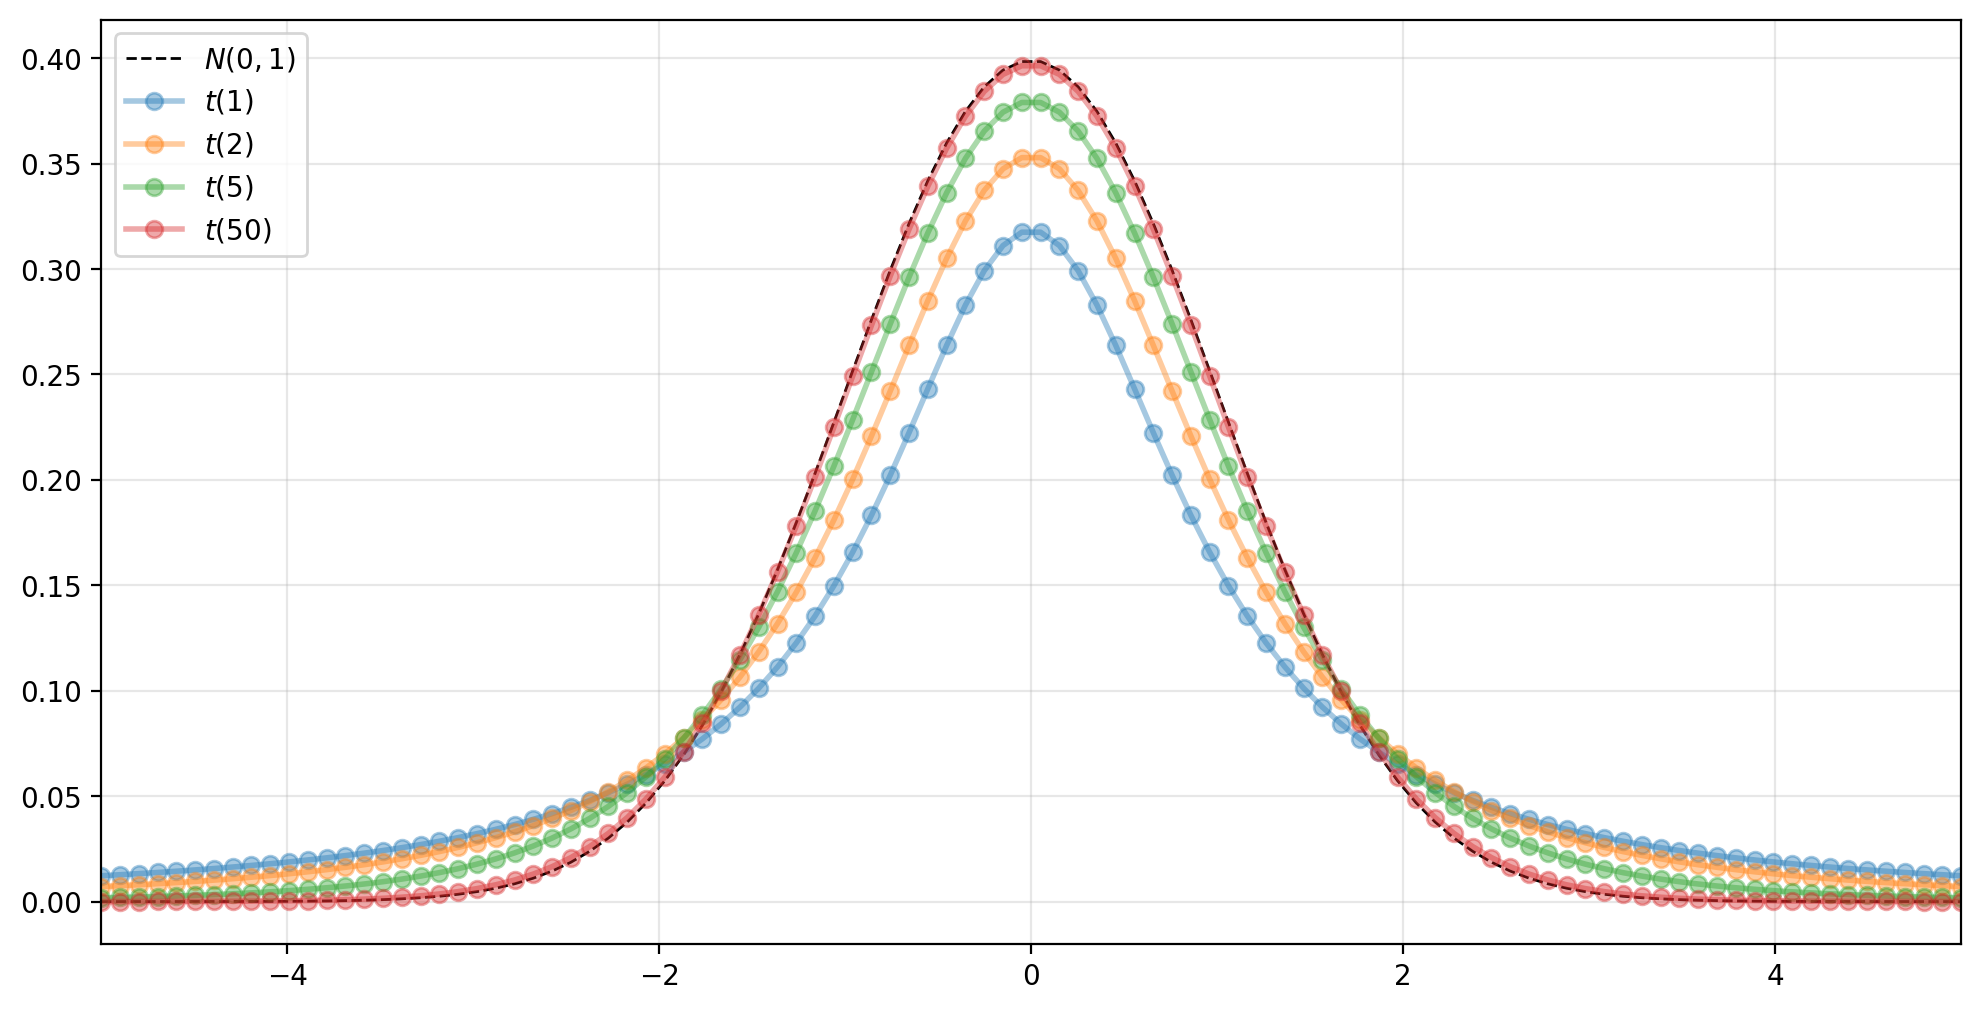

In [96]:
x = np.linspace(-5, 5, 100)

fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, scs.norm.pdf(x), 'k--', lw=1, label='$N(0,1)$')

for ν in [1,2,5,50]:
    ax.plot(x, scs.t.pdf(x, ν), 'o-', alpha=0.4, lw=2, label='$t({})$'.format(ν))

ax.legend(loc='upper left')
ax.grid(alpha=0.3)
ax.set_xlim((-5,5))
plt.show()

Note that as $\nu \rightarrow \infty$, the distribution converges to a standard normal distribution.

:::{admonition} Extra credit
:class: admonition-extra-credit, dropdown
The proof of this convergence is relatively easy if we use the [observation that](https://stats.stackexchange.com/a/449117/5166)

$$\lim_{\nu\to\infty} \frac{\Gamma\!\left(\frac{\nu+1}{2}\right)}{\Gamma\!\left(\frac{\nu}{2} \right)} = \sqrt{\tfrac{\nu}{2}}.$$

We have

\begin{align*}
\lim_{\nu\to\infty} f(x; \nu) &= \frac{1}{\sqrt{\nu\pi}} \cdot \sqrt{\tfrac{\nu}{2}} \cdot \lim_{\nu\to\infty} \left(1 + \frac{x^2}{\nu}\right)^{-\frac{\nu+1}{2}} \\
&= \frac{1}{\sqrt{2\pi}} \cdot \lim_{\nu\to\infty} \left\{ \left(1 + \frac{x^2}{\nu}\right)^{-\frac{1}{2}}  \left[\left(1 + \frac{x^2}{\nu}\right)^{\nu}\right]^{-\frac{1}{2}}\right\} \\
&= \frac{1}{\sqrt{2\pi}} \left[e^{x^2}\right]^{-\frac{1}{2}} \\
&= \frac{1}{\sqrt{2\pi}} \, \exp\left(-\frac{x^2}{2}\right),
\end{align*}

which is the PDF of the standard normal distribution.
:::

Since it has more mass in the extremes at extreme values than does a normal distribution, the $t$ distribution is said to have *fat tails*.

A random variable $X \sim t(\nu)$ has mean

$$\E(X) = \begin{cases}
0 & \text{ if } \nu>1\\
\text{undefined} & \text{ if } \nu\leq 1 
\end{cases}$$

and variance

$$\var(X) = \begin{cases}
\frac{\nu}{\nu-2} & \text{ if } \nu>2 \\
\infty & \text{ if } 1<\nu\leq 2 \\
\text{undefined} & \text{ if } \nu\leq 1.
\end{cases}
$$

## $F$ distribution

Given two independent chi-square distributed random variables, $Q_1$ and $Q_2$, with $k_1$ and $k_2$ degrees of freedom, respectively, the ratio

$$X = \frac {Q_{1}/k_{1}}{Q_{2}/k_{2}}$$

follows an $F$ distribution with $k_1$ and $k_2$ degrees of freedom.

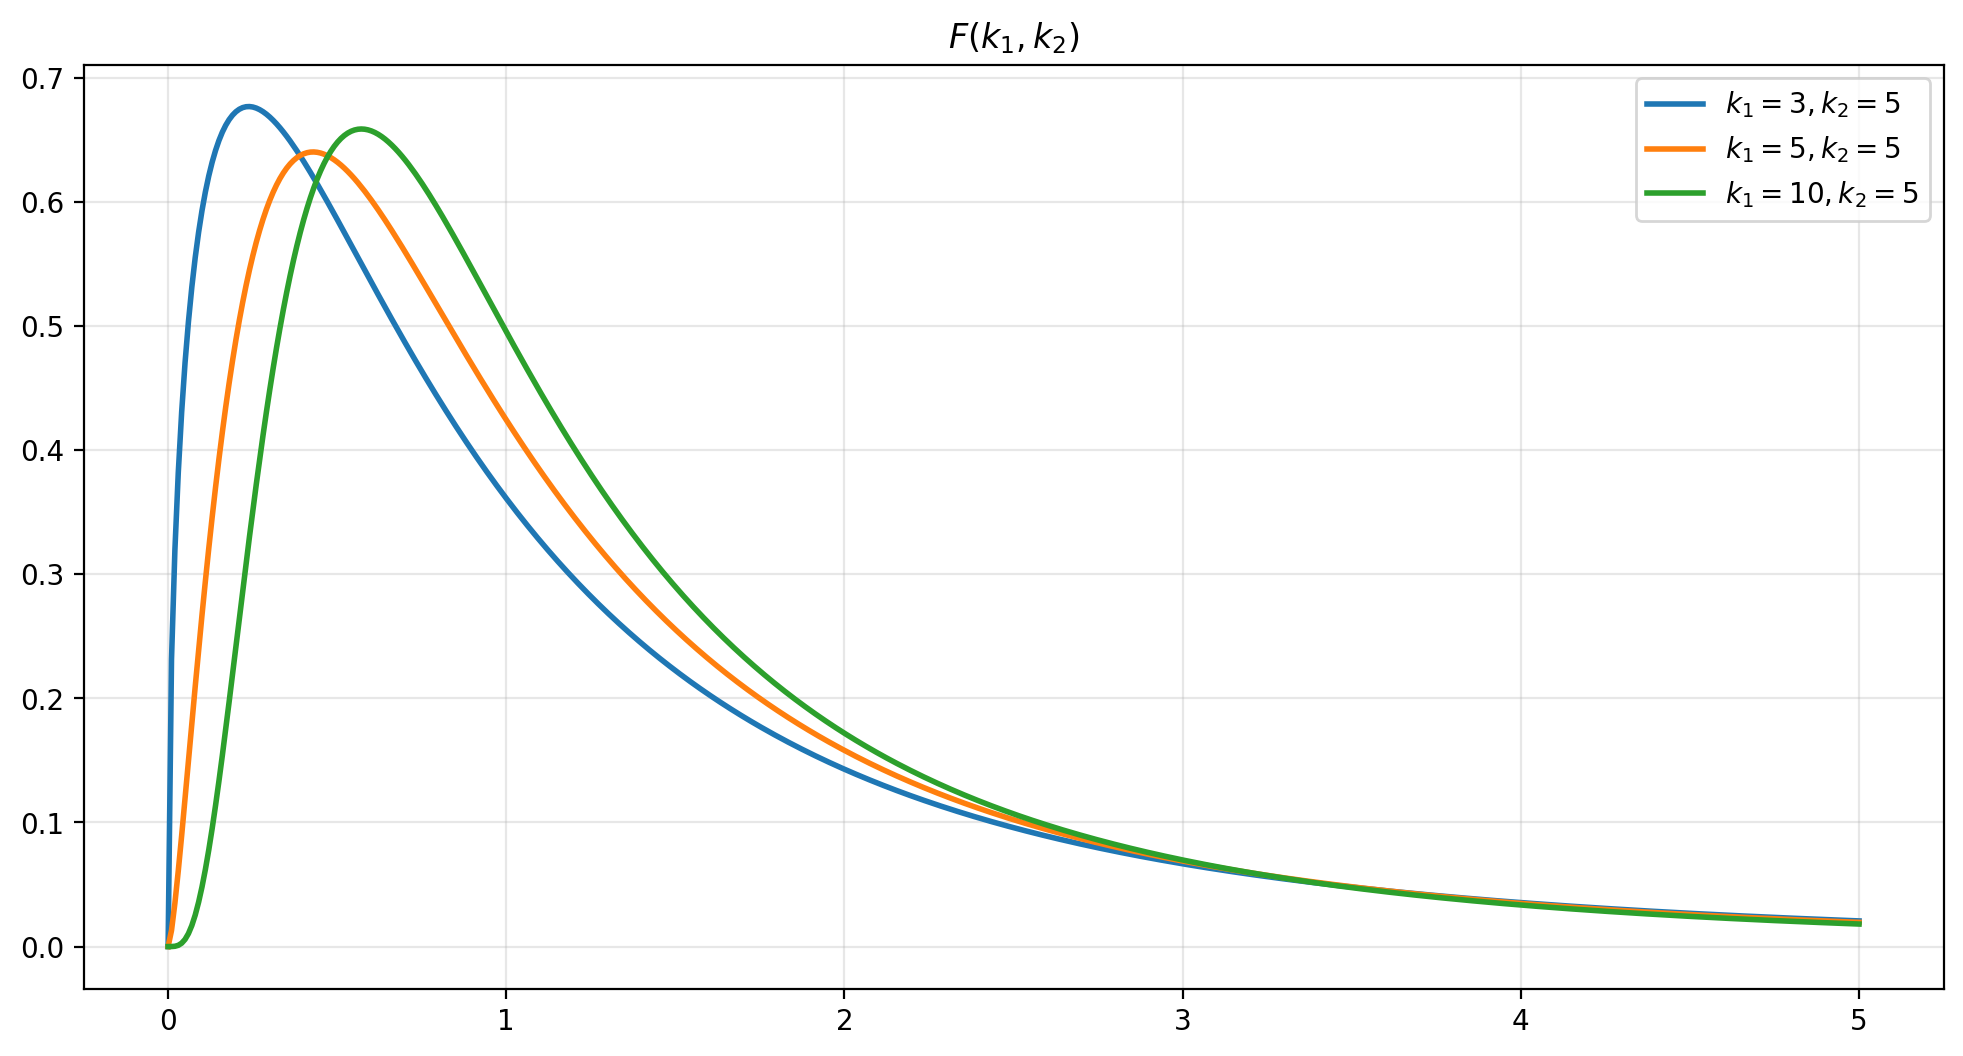

In [44]:
x = np.linspace(0, 5, 500)

fig, ax = plt.subplots(figsize=(12,6))

k2 = 5

for k1 in [3, 5, 10]:
    ax.plot(x, scs.f.pdf(x, k1, k2), lw=2, label='$k_1={}, k_2={}$'.format(k1, k2))

ax.grid(alpha=0.3)
ax.set_title('$F(k_1,k_2)$')
ax.legend(loc='upper right')
    
plt.show()

:::{admonition} Exercise

Use a simulation to verify the claimed relation between a standard normal distribution, the $\chi^2$ distribution, and the $F$ distribution.

1. Start by drawing 10 realizations of $X \sim \N(0,1).$ Calculate $S = \sum x_i^2$. Repeat this 1000 times. Show that the mean and variance of are close to the what you would expect from theory. You don't actually have to repeat the 10 draws 1000 times. You can draw a $1000\times 10$ array and then calculate the sum of squares within each row to get 1000 values and then calulate the mean and variance of those.

2. Now create 1000 draws from a different chi-square by taking the sum of squares of 15 draws from a standard normal. For each of these 1000 examples, calculate the ratio $\frac{S_{1}/k_{1}}{S_{2}/k_{2}}$ where $k_1$ and $k_2$ are the corresponding degrees of freedom. This will give you 1000 draws from an $F$ distribution. Show that the mean and variance also match what is predicted by theory.

:::

In [90]:
F = (X1/10) / (X2/15)

F.mean(), F.var()

(1.1438112865369205, 0.5380713620827265)

$$\frac{k_{2}}{k_{2}-2}$$

In [91]:
15 / 13

1.1538461538461537

$$\frac{2\,k_2^2(k_1+k_2-2)}{k_1(k_2-2)^2(k_2-4)}$$

In [92]:
(2 * 15**2 * (15 + 10 - 2)) / (10 * (15-2)**2 * (15-4))

0.556750941366326

# Other distributions

Many probability distributions have been developed by researchers seeking to describe various probabilistic phenomena. As we've seen with the connections between the several distributions above, distributions are usually related to others by making particular assumptions or by taking limits of parameters. The figure below, from {cite:ts}`leemis2008univariate`, shows the relationships between many (but by no means all) probability distributions. You can see, for example, that both the Poisson and Normal are limiting distributions of the Binomial distribution.

:::{margin}
An [interactive version](http://www.math.wm.edu/~leemis/chart/UDR/UDR.html) of this chart was created by some students at William & Mary and provides additional information about each of the listed distributions.
:::

```{image} ./images/distributions.png
:alt: Distributions
:width: 900px
:align: center
```